*about clusters: 
in the case of uniformly distributed data within a square, the points are generally spread out evenly without forming distinct clusters. Therefore, the number of clusters in such a sample is not meaningful or relevant.

### create the sample data:

In [5]:
import numpy as np

# Set the number of data points
num_points = 1000

# Generate random (x, y) points within the square region
x = np.random.uniform(0, 1, num_points)
y = np.random.uniform(0, 1, num_points)

# Combine the x and y coordinates to create the data points
data = np.column_stack((x, y))
test_set  = data[:100,:]
train_set = data[100: , :]

### the algorithm:

In [7]:
import math

class SOM:

    # Function here computes the winning vector
	# by Euclidean distance
	def winner(self, weights, sample):

		D0 = 0
		D1 = 0

		for i in range(len(sample)-1):

			D0 = D0 + math.pow((sample[i] - weights[0][i]), 2)
			D1 = D1 + math.pow((sample[i] - weights[1][i]), 2)

		# Selecting the cluster with smallest distance as winning cluster

		if D0 < D1:
			return 0
		else:
			return 1

	# Function here updates the winning vector
	def update(self, weights, sample, J, alpha):
		# Here iterating over the weights of winning cluster and modifying them
		for i in range(len(weights[0])-1):
			weights[J][i] = weights[J][i] + alpha * (sample[i] - weights[J][i])

		return weights

# Driver code


def main():

	# Training Examples ( m, n )
	T = train_set

	m, n = len(T), len(T[0])

	# weight initialization ( n, C )
	weights = [[0.2, 0.6], [0.8]]

	# training
	ob = SOM()

	epochs = 3
	alpha = 0.5

	for i in range(epochs):
		for j in range(m):

			# training sample
			sample = T[j]

			# Compute winner vector
			J = ob.winner(weights, sample)

			# Update winning vector
			weights = ob.update(weights, sample, J, alpha)

	# classify test sample
	s = test_set[2]
	J = ob.winner(weights, s)

	print("Test Sample s belongs to Cluster : ", J)
	print("Trained weights : ", weights)


if __name__ == "__main__":
	main()


Test Sample s belongs to Cluster :  1
Trained weights :  [[0.15294859963579868, 0.6], [0.5792640027292341]]


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Function to initialize the weight matrix
def initialize_weights(num_neurons, input_dim):
    return np.random.rand(num_neurons, input_dim)

# Function to find the best matching unit (BMU)
def find_bmu(input_vector, weights):
    distances = np.linalg.norm(input_vector - weights, axis=1)
    bmu_index = np.argmin(distances)
    return bmu_index

# Function to update the weights of the BMU and its neighbors
def update_weights(input_vector, weights, bmu_index, learning_rate, neighborhood_radius):
    influence = np.exp(-np.square(np.arange(weights.shape[0]) - bmu_index) / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, np.newaxis] * (input_vector - weights)

# Function to train the SOM
def train_som(data, num_neurons, input_dim, num_epochs, learning_rate, initial_radius):
    weights = initialize_weights(num_neurons, input_dim)

    for epoch in range(num_epochs):
        # Decay the learning rate and neighborhood radius over time
        curr_learning_rate = learning_rate * (1 - epoch / num_epochs)
        curr_radius = initial_radius * (1 - epoch / num_epochs)

        for input_vector in data:
            # Find the BMU and update its weights
            bmu_index = find_bmu(input_vector, weights)
            update_weights(input_vector, weights, bmu_index, curr_learning_rate, curr_radius)

    return weights




little explanation on BMU function : 
`bmu_index = np.argmin(distances)`: This line finds the index of the neuron with the minimum distance, i.e., the neuron that is the closest match to the input_vector
. `return bmu_index`: The function returns the index of the BMU, representing the neuron in the SOM that is the closest match to the input_vector.
In summary, the `find_bmu` function calculates the distances between the input_vector and each neuron's weight vector, and then determines the index of the neuron with the minimum distance, i.e., the BMU

### try with 20 noirons

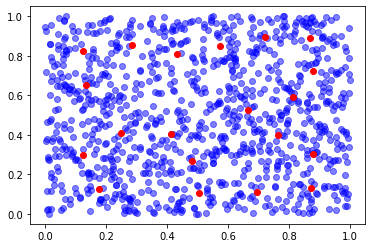

In [18]:
# Generate training data (a square)
data = np.random.rand(1000, 2)

# Define the parameters for the SOM
num_neurons = 20  # Number of neurons in the line
input_dim = 2  # Dimensionality of the input data
num_epochs = 100  # Number of training epochs
learning_rate = 0.1  # Learning rate
initial_radius = num_neurons / 2  # Initial neighborhood radius

# Train the SOM
weights = train_som(data, num_neurons, input_dim, num_epochs, learning_rate, initial_radius)

# Plot the resulting line of neurons
plt.scatter(data[:, 0], data[:, 1], c='blue', alpha=0.5)
plt.scatter(weights[:, 0], weights[:, 1], c='red')
plt.show()

### try with 100 noirons

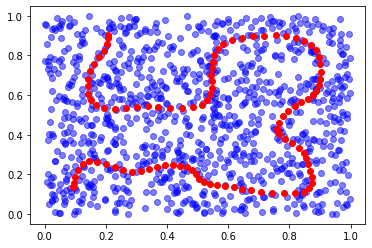

In [16]:

# Define the parameters for the SOM
num_neurons = 100  # Number of neurons in the line
input_dim = 2  # Dimensionality of the input data
num_epochs = 100  # Number of training epochs
learning_rate = 0.1  # Learning rate
initial_radius = num_neurons / 2  # Initial neighborhood radius

# Train the SOM
weights = train_som(data, num_neurons, input_dim, num_epochs, learning_rate, initial_radius)

# Plot the resulting line of neurons
plt.scatter(data[:, 0], data[:, 1], c='blue', alpha=0.5)
plt.scatter(weights[:, 0], weights[:, 1], c='red')
plt.show()

#### What happens as the number of iterations of algorithm increases?

In [23]:
# Generate training data (a square)
data = np.random.rand(1000, 2)

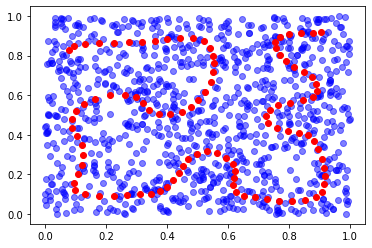

In [25]:
# Define the parameters for the SOM
num_neurons = 100  # Number of neurons in the line
input_dim = 2  # Dimensionality of the input data
num_epochs = 300  # Number of training epochs
learning_rate = 0.1  # Learning rate
initial_radius = num_neurons / 2  # Initial neighborhood radius

# Train the SOM
weights = train_som(data, num_neurons, input_dim, num_epochs, learning_rate, initial_radius)

# Plot the resulting line of neurons
plt.scatter(data[:, 0], data[:, 1], c='blue', alpha=0.5)
plt.scatter(weights[:, 0], weights[:, 1], c='red')
plt.show()

In [ ]:
 # We got a similar shape but the "opening" of the neuron line is in a different place

### First non-uniform distribution, points are concentrated towards the left side of the square.

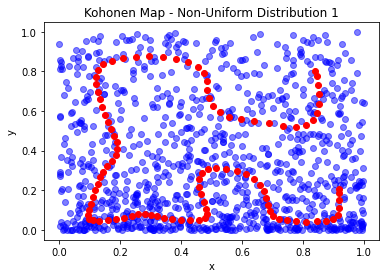

In [30]:

# Generate non-uniform data points within the square
x = np.random.uniform(0, 1, 1000)
y = np.random.uniform(0, 1, 1000) ** 2  # Probability proportional to x^2
data = np.column_stack((x, y))

# Define the parameters for the SOM
num_neurons = 100  # Number of neurons in the line
input_dim = 2  # Dimensionality of the input data
num_epochs = 100  # Number of training epochs
learning_rate = 0.1  # Learning rate
initial_radius = num_neurons / 2  # Initial neighborhood radius

# Train the SOM
weights = train_som(data, num_neurons, input_dim, num_epochs, learning_rate, initial_radius)

# Plot the resulting Kohonen map
plt.scatter(data[:, 0], data[:, 1], c='blue', alpha=0.5)
plt.scatter(weights[:, 0], weights[:, 1], c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kohonen Map - Non-Uniform Distribution 1')
plt.show()

### Second non-uniform distribution, points are concentrated towards the bottom side of the square.

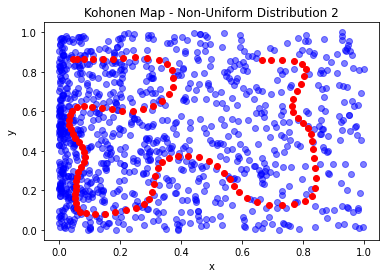

In [31]:
# Generate non-uniform data points within the square
x = np.random.uniform(0, 1, 1000) ** 2  # Probability proportional to x^2
y = np.random.uniform(0, 1, 1000)
data = np.column_stack((x, y))

# Train the SOM
weights = train_som(data, num_neurons, input_dim, num_epochs, learning_rate, initial_radius)

# Plot the resulting Kohonen map
plt.scatter(data[:, 0], data[:, 1], c='blue', alpha=0.5)
plt.scatter(weights[:, 0], weights[:, 1], c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kohonen Map - Non-Uniform Distribution 2')
plt.show()


In [ ]:
#### The same code - just increasing number of itaration:

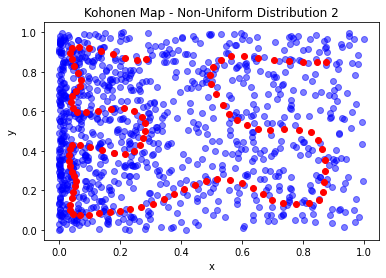

In [32]:
# Define the parameters for the SOM
num_neurons = 100  # Number of neurons in the line
input_dim = 2  # Dimensionality of the input data
num_epochs = 300  # Number of training epochs
learning_rate = 0.1  # Learning rate
initial_radius = num_neurons / 2  # Initial neighborhood radius

# Generate non-uniform data points within the square
x = np.random.uniform(0, 1, 1000) ** 2  # Probability proportional to x^2
y = np.random.uniform(0, 1, 1000)
data = np.column_stack((x, y))

# Train the SOM
weights = train_som(data, num_neurons, input_dim, num_epochs, learning_rate, initial_radius)

# Plot the resulting Kohonen map
plt.scatter(data[:, 0], data[:, 1], c='blue', alpha=0.5)
plt.scatter(weights[:, 0], weights[:, 1], c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kohonen Map - Non-Uniform Distribution 2')
plt.show()


#### By observing the snapshots of the Kohonen maps as the number of iterations grows, you can see how the neurons gradually adapt and organize themselves to capture the underlying patterns of the non-uniform distributions.
That is, the number of neurons on the side where there is more data increases and, in contrast, their number on the other side is small.

### try with donate shape:

In [27]:
# Generate training data (a donut shape)
theta = np.linspace(0, 2 * np.pi, 1000)
r = np.random.uniform(2, 4, 1000)
x = r * np.cos(theta)
y = r * np.sin(theta)
data = np.column_stack((x, y))


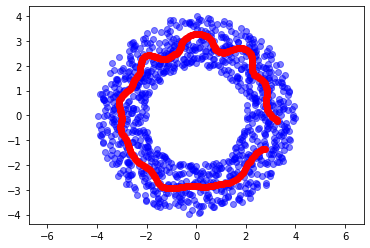

In [28]:


# Define the parameters for the SOM
num_neurons = 300  # Number of neurons in the circle
input_dim = 2  # Dimensionality of the input data
num_epochs = 200  # Number of training epochs
learning_rate = 0.1  # Learning rate
initial_radius = num_neurons / 2  # Initial neighborhood radius

# Train the SOM
weights = train_som(data, num_neurons, input_dim, num_epochs, learning_rate, initial_radius)

# Plot the resulting circle of neurons
plt.scatter(data[:, 0], data[:, 1], c='blue', alpha=0.5)
plt.scatter(weights[:, 0], weights[:, 1], c='red')
plt.axis('equal')
plt.show()

#### What happens as the number of iterations of algorithm increases?

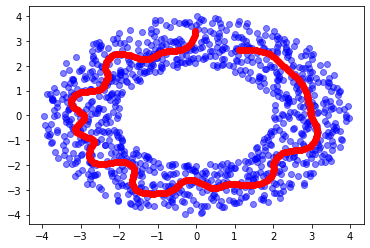

In [29]:

# Define the parameters for the SOM
num_neurons = 300  # Number of neurons in the line
input_dim = 2  # Dimensionality of the input data
num_epochs = 300  # Number of training epochs
learning_rate = 0.1  # Learning rate
initial_radius = num_neurons / 2  # Initial neighborhood radius

# Train the SOM
weights = train_som(data, num_neurons, input_dim, num_epochs, learning_rate, initial_radius)

# Plot the resulting line of neurons
plt.scatter(data[:, 0], data[:, 1], c='blue', alpha=0.5)
plt.scatter(weights[:, 0], weights[:, 1], c='red')
plt.show()